In [1]:
#Connexion avec Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# **Exploration des donnees**

In [3]:
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('CreditCard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
numerical_stats = df.describe()
print("Statistiques descriptives pour les variables numériques :")
print(numerical_stats)

Statistiques descriptives pour les variables numériques :
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min

In [6]:
numerical_columns = df.select_dtypes(include='number').columns

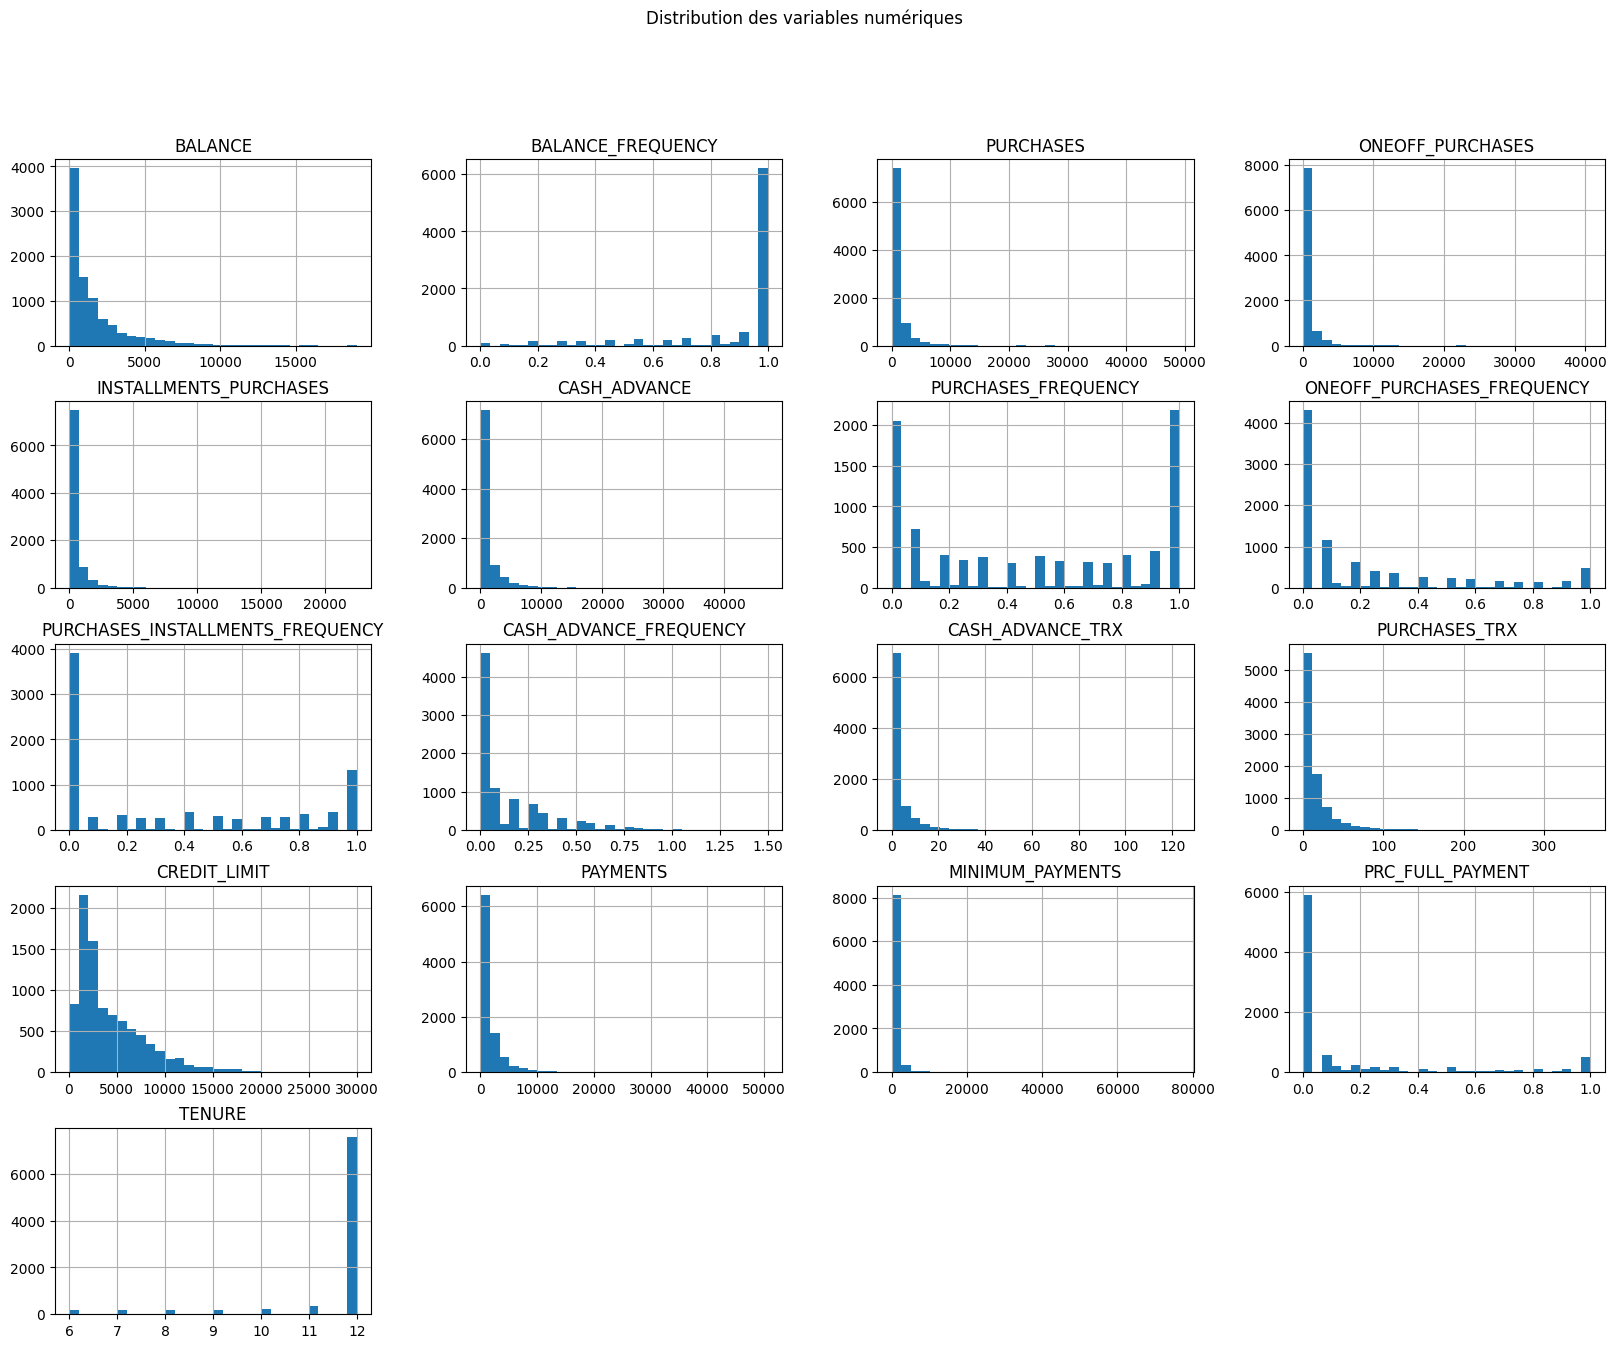

In [7]:
import matplotlib.pyplot as plt

# Histogrammes pour chaque colonne numérique
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution des variables numériques')
plt.show()


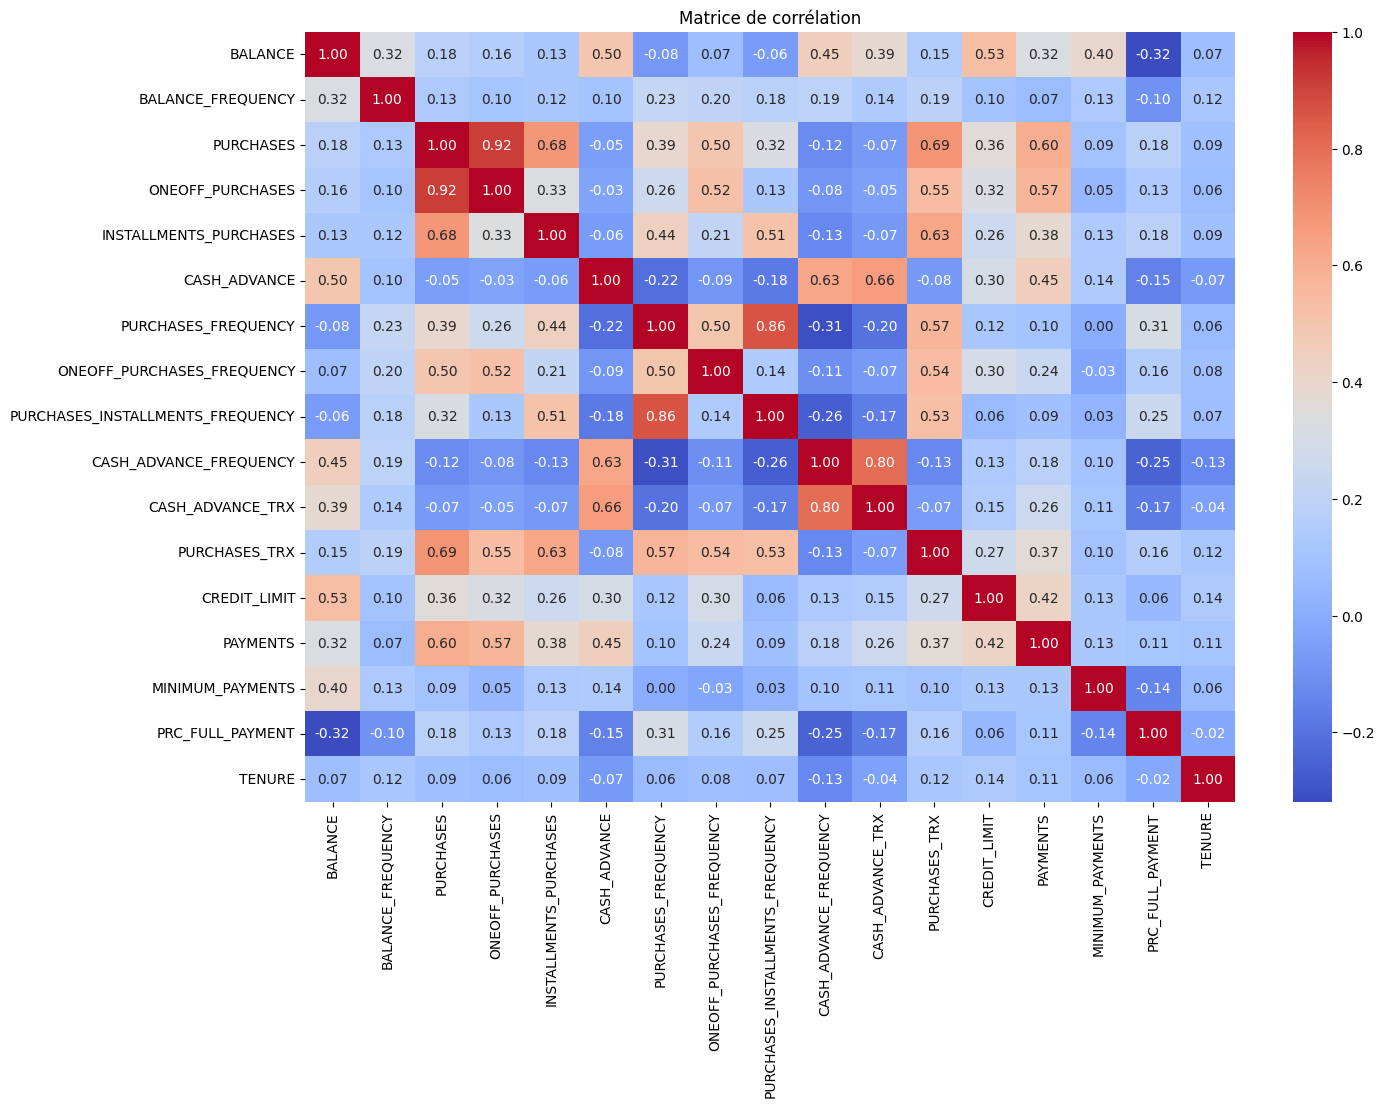

In [8]:
# Calcul de la matrice de corrélation
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [9]:
# Pairplot des variables
sns.pairplot(df.iloc[:, 1:], diag_kind='kde')  # Sauter 'CUST_ID'
plt.suptitle('Pairplot des variables')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Préparation des Données:**

## ***Supprimer les colonnes:***
Variable '**CUST_ID**' avec des valeurs non utiles

In [10]:
df = df.drop(['CUST_ID'], axis=1)

In [11]:
import pandas as pd

def calculate_ranges(df):

    ranges = {}
    for col in df.select_dtypes(include='number').columns:
        series = df[col]
        min_val = series.min()
        max_val = series.max()
        ranges[col] = (min_val, max_val)

    return ranges


ranges = calculate_ranges(df)

# Affichage des intervalles calculés pour chaque colonne numérique
for col, values in ranges.items():
    print(f"Colonne : {col}")
    print(f"Intervalles : min={values[0]}, max={values[1]}")
    print()

Colonne : BALANCE
Intervalles : min=0.0, max=19043.13856

Colonne : BALANCE_FREQUENCY
Intervalles : min=0.0, max=1.0

Colonne : PURCHASES
Intervalles : min=0.0, max=49039.57

Colonne : ONEOFF_PURCHASES
Intervalles : min=0.0, max=40761.25

Colonne : INSTALLMENTS_PURCHASES
Intervalles : min=0.0, max=22500.0

Colonne : CASH_ADVANCE
Intervalles : min=0.0, max=47137.21176

Colonne : PURCHASES_FREQUENCY
Intervalles : min=0.0, max=1.0

Colonne : ONEOFF_PURCHASES_FREQUENCY
Intervalles : min=0.0, max=1.0

Colonne : PURCHASES_INSTALLMENTS_FREQUENCY
Intervalles : min=0.0, max=1.0

Colonne : CASH_ADVANCE_FREQUENCY
Intervalles : min=0.0, max=1.5

Colonne : CASH_ADVANCE_TRX
Intervalles : min=0, max=123

Colonne : PURCHASES_TRX
Intervalles : min=0, max=358

Colonne : CREDIT_LIMIT
Intervalles : min=50.0, max=30000.0

Colonne : PAYMENTS
Intervalles : min=0.0, max=50721.48336

Colonne : MINIMUM_PAYMENTS
Intervalles : min=0.019163, max=76406.20752

Colonne : PRC_FULL_PAYMENT
Intervalles : min=0.0, max=1.

Avec une seule valeur possible:

In [12]:
df = df.drop(['BALANCE_FREQUENCY','CASH_ADVANCE','CASH_ADVANCE_TRX','PRC_FULL_PAYMENT','TENURE'], axis=1)

In [13]:
df


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,95.40,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787
1,3202.467416,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,773.17,0.00,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787
3,1666.670542,1499.00,1499.00,0.00,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,NaN
4,817.714335,16.00,16.00,0.00,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,291.12,1.000000,0.000000,0.833333,0.000000,6,1000.0,325.594462,48.886365
8946,19.183215,300.00,0.00,300.00,1.000000,0.000000,0.833333,0.000000,6,1000.0,275.861322,NaN
8947,23.398673,144.40,0.00,144.40,0.833333,0.000000,0.666667,0.000000,5,1000.0,81.270775,82.418369
8948,13.457564,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628


## ***Supprimer des lignes:***
Ligne dupliquees

In [14]:
#Lignes dupliquées

duplicate_rows = df[df.duplicated()]

# Print the duplicate rows, if any
if not duplicate_rows.empty:
    print("les lignes dupliquees:")
    print(duplicate_rows)
else:
    print("Il n'y a pas de lignes dupliquees.")

Il n'y a pas de lignes dupliquees.


## ***Remplacement des NaN par la médiane de la colonne***

In [15]:
df.isna().sum()

BALANCE                               0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
dtype: int64

In [16]:
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
print("Valeurs manquantes après le remplacement :")
print(df.isna().sum())

Valeurs manquantes après le remplacement :
BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
dtype: int64


## ***Gerer les valeurs aberrantes:***

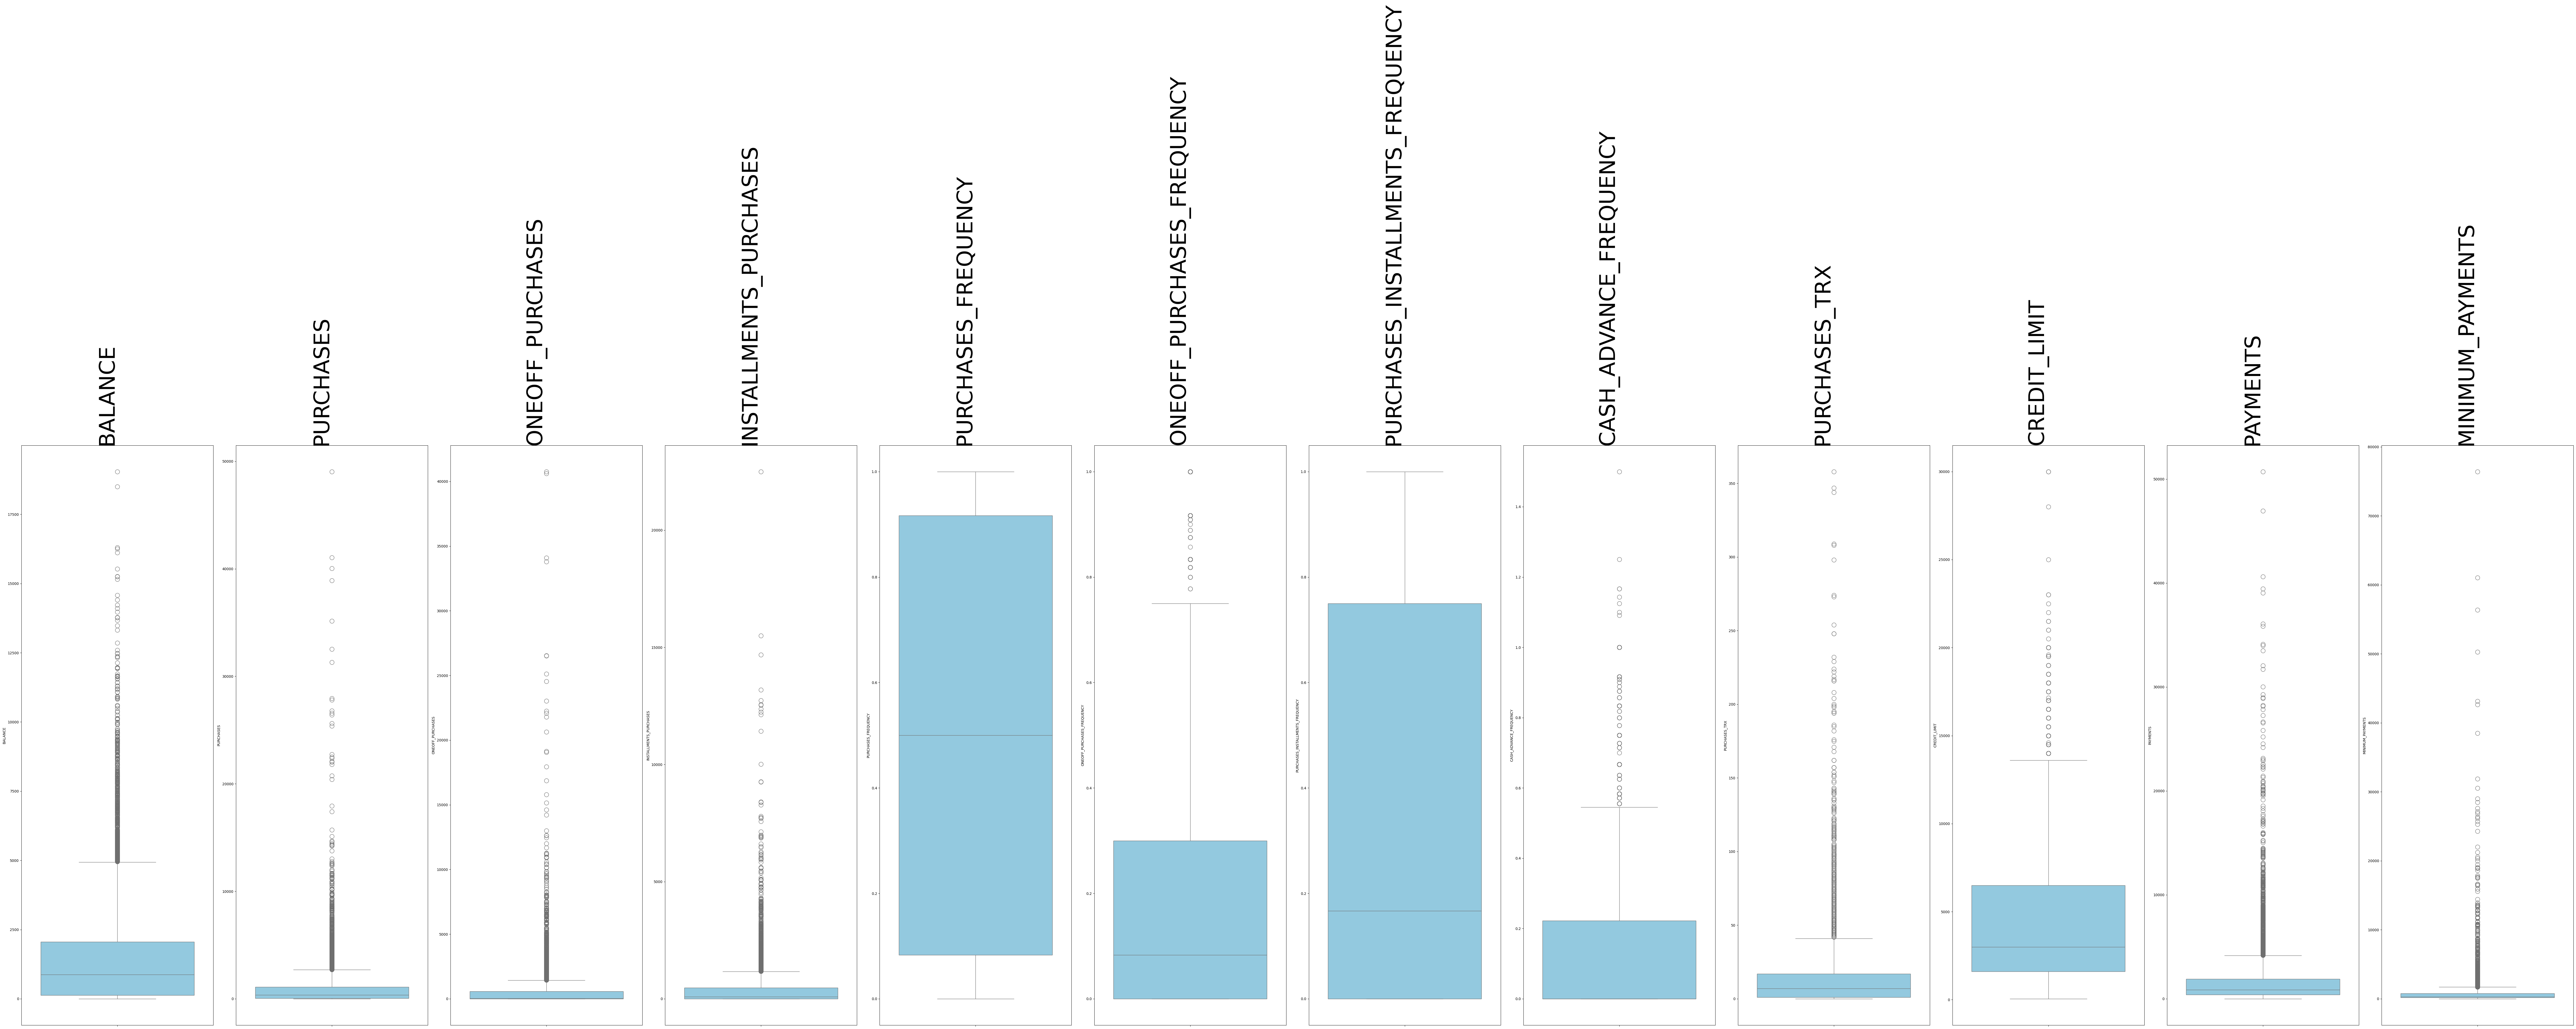

In [18]:
# Créer des box plots pour chaque variable numérique

plt.figure(figsize=(100, 40))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[col], color='skyblue', flierprops=dict(marker='o', color='red', markersize=12))
    plt.title(col, fontsize=60, rotation=90, ha='right', va='center')

plt.tight_layout()
plt.show()


### Remplacer les valeurs **aberrantes** par **mediane** pour les champs **numeriques**





In [19]:
def remplacer_outliers_avec_mediane(df, colonne):
    outliers_count = -1
    iteration = 0

    while outliers_count != 0:
        Q1 = df[colonne].quantile(0.25)
        Q3 = df[colonne].quantile(0.75)
        IQR = Q3 - Q1
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR

        # Identifier les valeurs aberrantes
        valeurs_aberrantes = df[(df[colonne] < borne_inferieure) | (df[colonne] > borne_superieure)][colonne]
        outliers_count = len(valeurs_aberrantes)

        print(f"Iteration {iteration} : {outliers_count} valeurs aberrantes dans la colonne '{colonne}'")

        # Remplacer les valeurs aberrantes par la médiane
        mediane = df[colonne].median()
        df[colonne] = np.where((df[colonne] < borne_inferieure) | (df[colonne] > borne_superieure), mediane, df[colonne])

        iteration += 1

# Appliquer la fonction à chaque colonne numérique
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns

for col in colonnes_numeriques:
    remplacer_outliers_avec_mediane(df, col)


Iteration 0 : 695 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 1 : 438 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 2 : 261 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 3 : 216 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 4 : 171 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 5 : 123 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 6 : 103 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 7 : 89 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 8 : 63 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 9 : 50 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 10 : 54 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 11 : 37 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 12 : 0 valeurs aberrantes dans la colonne 'BALANCE'
Iteration 0 : 808 valeurs aberrantes dans la colonne 'PURCHASES'
Iteration 1 : 602 valeurs aberrantes dans la colonne 'PURCHASES'
Iteration 2 : 534 valeurs aberrantes dans la colonne 'P

In [20]:
# Vérifier si les valeurs aberrantes ont été remplacées
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR
    valeurs_aberrantes = df[(df[col] < borne_inferieure) | (df[col] > borne_superieure)][col]
    print(f"Après le remplacement, valeurs aberrantes pour {col} : {len(valeurs_aberrantes)} aberrations")


Après le remplacement, valeurs aberrantes pour BALANCE : 0 aberrations
Après le remplacement, valeurs aberrantes pour PURCHASES : 0 aberrations
Après le remplacement, valeurs aberrantes pour ONEOFF_PURCHASES : 0 aberrations
Après le remplacement, valeurs aberrantes pour INSTALLMENTS_PURCHASES : 0 aberrations
Après le remplacement, valeurs aberrantes pour PURCHASES_FREQUENCY : 0 aberrations
Après le remplacement, valeurs aberrantes pour ONEOFF_PURCHASES_FREQUENCY : 0 aberrations
Après le remplacement, valeurs aberrantes pour PURCHASES_INSTALLMENTS_FREQUENCY : 0 aberrations
Après le remplacement, valeurs aberrantes pour CASH_ADVANCE_FREQUENCY : 0 aberrations
Après le remplacement, valeurs aberrantes pour PURCHASES_TRX : 0 aberrations
Après le remplacement, valeurs aberrantes pour CREDIT_LIMIT : 0 aberrations
Après le remplacement, valeurs aberrantes pour PAYMENTS : 0 aberrations
Après le remplacement, valeurs aberrantes pour MINIMUM_PAYMENTS : 0 aberrations


## ***Standarisation***


Variable '**`BALANCE`**' avec le nombre de valeurs distinctes est proche de les nombres des lignes de dataset; ce qui apparait que chaqun ligne a sa propre valeur

In [21]:
colonne = 'BALANCE'

# Nombre total des valeurs distinctes dans la colonne
total_valeurs_distinctes = df[colonne].nunique()

print(f"Nombre total des valeurs distinctes de la colonne '{colonne}': {total_valeurs_distinctes}")

Nombre total des valeurs distinctes de la colonne 'BALANCE': 6583


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

In [23]:
X_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-1.208440,-0.809223,-0.975302,0.752759,-0.806490,-0.947683,-0.707313,-0.661760,-0.761957,-1.056237,-1.343017,-1.086914
1,0.389707,-1.260305,-0.975302,-1.002835,-1.221758,-0.947683,-0.916995,1.448695,-1.137182,1.037801,0.461481,0.549267
2,0.389583,2.395494,0.806478,-1.002835,1.269843,0.626957,-0.916995,-0.661760,1.114165,1.212305,-0.185239,0.549267
3,1.913431,0.447200,0.806478,-1.002835,-1.014125,0.626957,-0.916995,0.041722,-0.949569,1.212305,-1.898958,0.549267
4,0.283230,-1.184652,-0.225078,-1.002835,-1.014125,0.626957,-0.916995,-0.661760,-0.949569,-0.986435,-0.030227,-0.090239
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.232264,0.116205,-0.975302,0.634983,1.269843,-0.947683,1.179833,-0.661760,-0.011508,-1.056237,-1.001984,-1.944825
8946,-1.250142,0.158193,-0.975302,0.634983,1.269843,-0.947683,1.179833,-0.661760,-0.011508,-1.056237,-1.138993,0.549267
8947,-1.242048,-0.577535,-0.975302,1.654479,0.854576,-0.947683,0.760469,-0.661760,-0.199120,-1.056237,-1.675066,-1.627385
8948,-1.261137,-1.260305,-0.975302,-1.002835,-1.221758,-0.947683,-0.916995,0.745213,-1.137182,-1.230740,-1.754189,-1.879795


# **Choix de la Tâche et de l'Algorithme d'Exploration de Données**

In [24]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [25]:
# Sélection des modèles et paramètres
# K-means clustering
kmeans_inertia = []
kmeans_silhouette = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_silhouette.append(silhouette)
    print(f"K-means: k={k}, Silhouette Score={silhouette}")

# Sélection du meilleur K pour K-means
best_k = k_values[np.argmax(kmeans_silhouette)]
print(f"Best K for K-means: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=2, Silhouette Score=0.25452241730324343


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=3, Silhouette Score=0.2281914858769821


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=4, Silhouette Score=0.23801418292530818


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=5, Silhouette Score=0.21263328115299984


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=6, Silhouette Score=0.1858443612949435


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=7, Silhouette Score=0.18668449866136969


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=8, Silhouette Score=0.19278181768880567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: k=9, Silhouette Score=0.19085563567631336
Best K for K-means: 2


In [26]:

# Gaussian Mixture Models (EM clustering)
gmm_bic = []
gmm_silhouette = []
gmm_components = range(2, 10)
for n in gmm_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full', max_iter=300, random_state=42)
    gmm.fit(X_scaled)
    bic = gmm.bic(X_scaled)
    labels = gmm.predict(X_scaled)
    gmm_bic.append(bic)
    gmm_silhouette.append(silhouette)
    print(f"GMM: n_components={n}, BIC={bic}")

# Sélection du meilleur nombre de composants pour GMM
best_n_components = gmm_components[np.argmin(gmm_bic)]
print(f"Best number of components for GMM: {best_n_components}")

GMM: n_components=2, BIC=115142.17028043605
GMM: n_components=3, BIC=41903.07565705999
GMM: n_components=4, BIC=-64008.761111571905
GMM: n_components=5, BIC=-81103.46322627246
GMM: n_components=6, BIC=-108306.46612908746
GMM: n_components=7, BIC=-121534.91703350021
GMM: n_components=8, BIC=-132891.84945370592
GMM: n_components=9, BIC=-132448.64474651968
Best number of components for GMM: 8


In [27]:

# Évaluation finale des modèles avec les meilleurs paramètres
best_kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, random_state=42)
best_kmeans.fit(X_scaled)
kmeans_final_silhouette = silhouette_score(X_scaled, best_kmeans.labels_)
print(f"Final K-means Silhouette Score: {kmeans_final_silhouette}")

best_gmm = GaussianMixture(n_components=best_n_components, covariance_type='full', max_iter=300, random_state=42)
best_gmm.fit(X_scaled)
gmm_final_labels = best_gmm.predict(X_scaled)
gmm_final_silhouette = silhouette_score(X_scaled, gmm_final_labels)
print(f"Final GMM Silhouette Score: {gmm_final_silhouette}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Final K-means Silhouette Score: 0.25452241730324343
Final GMM Silhouette Score: 0.15931402269612058


In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [30]:
# Add cluster labels to the original dataframe
X_scaled['Cluster'] = kmeans.labels_
X_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,Cluster
0,-1.208440,-0.809223,-0.975302,0.752759,-0.806490,-0.947683,-0.707313,-0.661760,-0.761957,-1.056237,-1.343017,-1.086914,2
1,0.389707,-1.260305,-0.975302,-1.002835,-1.221758,-0.947683,-0.916995,1.448695,-1.137182,1.037801,0.461481,0.549267,0
2,0.389583,2.395494,0.806478,-1.002835,1.269843,0.626957,-0.916995,-0.661760,1.114165,1.212305,-0.185239,0.549267,1
3,1.913431,0.447200,0.806478,-1.002835,-1.014125,0.626957,-0.916995,0.041722,-0.949569,1.212305,-1.898958,0.549267,0
4,0.283230,-1.184652,-0.225078,-1.002835,-1.014125,0.626957,-0.916995,-0.661760,-0.949569,-0.986435,-0.030227,-0.090239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.232264,0.116205,-0.975302,0.634983,1.269843,-0.947683,1.179833,-0.661760,-0.011508,-1.056237,-1.001984,-1.944825,2
8946,-1.250142,0.158193,-0.975302,0.634983,1.269843,-0.947683,1.179833,-0.661760,-0.011508,-1.056237,-1.138993,0.549267,2
8947,-1.242048,-0.577535,-0.975302,1.654479,0.854576,-0.947683,0.760469,-0.661760,-0.199120,-1.056237,-1.675066,-1.627385,2
8948,-1.261137,-1.260305,-0.975302,-1.002835,-1.221758,-0.947683,-0.916995,0.745213,-1.137182,-1.230740,-1.754189,-1.879795,0


# **Évaluation et Interprétation des Résultats**


In [31]:
# Calculer la Sum of Squared Errors (SSE)
sse = kmeans.inertia_

# Afficher la valeur de SSE
print(f"SSE: {sse}")

SSE: 67295.41610748967


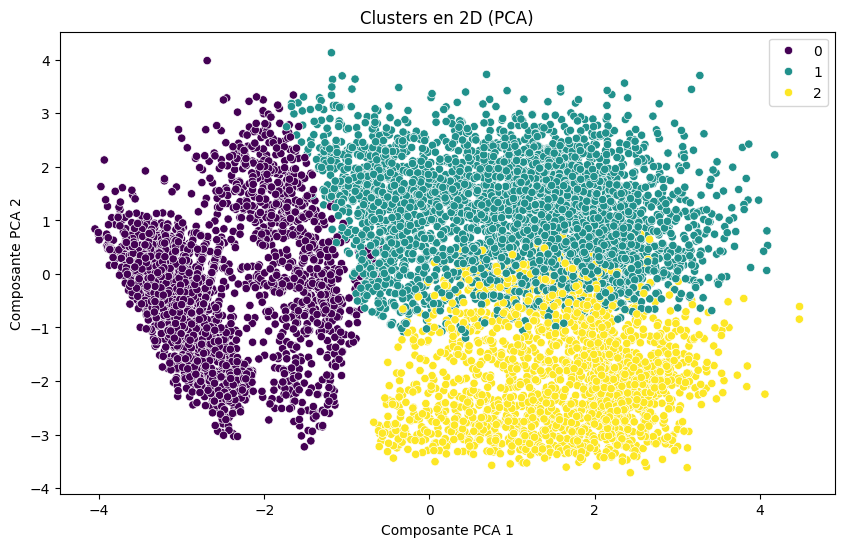

In [32]:
# Optionnel : Visualiser les clusters en 2D (PCA ou t-SNE)
# Importer PCA pour la réduction de dimensionnalité
from sklearn.decomposition import PCA

# Réduire la dimensionnalité à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tracer les clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis', legend='full')
plt.title('Clusters en 2D (PCA)')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.show()


In [33]:
# Explore cluster details
for cluster in sorted(X_scaled['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = X_scaled[X_scaled['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 0:
           BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  2941.000000  2941.000000       2941.000000             2941.000000   
mean      0.330640    -1.082728         -0.582132               -0.886718   
std       0.963623     0.382392          0.815219                0.405797   
min      -1.286979    -1.260305         -0.975302               -1.002835   
25%      -0.331108    -1.260305         -0.975302               -1.002835   
50%       0.389707    -1.260305         -0.975302               -1.002835   
75%       0.818599    -1.093395         -0.975302               -1.002835   
max       2.535229     1.304670          3.432259                3.059322   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          2941.000000                 2941.000000   
mean             -1.112985                   -0.589168   
std               0.211096                    0.714357   
min              -1.221758                   -0.947683   
25% 

In [34]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.253101983777367


In [35]:
kmeans_sse = kmeans.inertia_
print(f'SSE for K-Means: {kmeans_sse}')

SSE for K-Means: 67295.41610748967


# **Deploiement**

In [36]:
import pickle
with open('/content/drive/MyDrive/CreditCardDataset/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [37]:
#Enregistrer le modèle final

pickle.dump(kmeans, open('/content/drive/MyDrive/CreditCardDataset/model.pkl', 'wb'))